<a href="https://colab.research.google.com/github/KgadiKatse/Other-Machine-Learning/blob/main/Seoul_Bike_Sharing_Prediction_Decision_Tree_%26_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import missingno as msno
import os
import math
import pydotplus
from collections import Counter
from sklearn import preprocessing
from sklearn import tree

# Machine Learning
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

# Metrics
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from sklearn import neighbors
from math import sqrt

# Visualisation
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline

# For Filtering the warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# load the dataset with pandas read_csv function
seoul_df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/applied machine learning/SeoulBikeData.csv', encoding = 'unicode_escape')

In [ ]:
seoul_df.shape

(8760, 14)

In [ ]:
seoul_df.head(10).transpose()

0           1           2           3  \
Date                       01/12/2017  01/12/2017  01/12/2017  01/12/2017   
Rented Bike Count                 254         204         173         107   
Hour                                0           1           2           3   
Temperature(°C)                  -5.2        -5.5        -6.0        -6.2   
Humidity(%)                        37          38          39          40   
Wind speed (m/s)                  2.2         0.8         1.0         0.9   
Visibility (10m)                 2000        2000        2000        2000   
Dew point temperature(°C)       -17.6       -17.6       -17.7       -17.6   
Solar Radiation (MJ/m2)           0.0         0.0         0.0         0.0   
Rainfall(mm)                      0.0         0.0         0.0         0.0   
Snowfall (cm)                     0.0         0.0         0.0         0.0   
Seasons                        Winter      Winter      Winter      Winter   
Holiday                    No Holiday  No Holiday  No Holiday  No Holiday   
Functioning Day                   Yes         Yes         Yes         Yes   

                                    4           5           6           7  \
Date                       01/12/2017  01/12/2017  01/12/2017  01/12/2017   
Rented Bike Count                  78         100         181         460   
Hour                                4           5           6           7   
Temperature(°C)                  -6.0        -6.4        -6.6        -7.4   
Humidity(%)                        36          37          35          38   
Wind speed (m/s)                  2.3         1.5         1.3         0.9   
Visibility (10m)                 2000        2000        2000        2000   
Dew point temperature(°C)       -18.6       -18.7       -19.5       -19.3   
Solar Radiation (MJ/m2)           0.0         0.0         0.0         0.0   
Rainfall(mm)                      0.0         0.0         0.0         0.0   
Snowfall (cm)                     0.0         0.0         0.0         0.0   
Seasons                        Winter      Winter      Winter      Winter   
Holiday                    No Holiday  No Holiday  No Holiday  No Holiday   
Functioning Day                   Yes         Yes         Yes         Yes   

                                    8           9  
Date                       01/12/2017  01/12/2017  
Rented Bike Count                 930         490  
Hour                                8           9  
Temperature(°C)                  -7.6        -6.5  
Humidity(%)                        37          27  
Wind speed (m/s)                  1.1         0.5  
Visibility (10m)                 2000        1928  
Dew point temperature(°C)       -19.8       -22.4  
Solar Radiation (MJ/m2)          0.01        0.23  
Rainfall(mm)                      0.0         0.0  
Snowfall (cm)                     0.0         0.0  
Seasons                        Winter      Winter  
Holiday                    No Holiday  No Holiday  
Functioning Day                   Yes         Yes

In [ ]:
seoul_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [ ]:
seoul_df.describe(include="all").transpose()

count unique         top  freq         mean  \
Date                         8760    365  01/12/2017    24          NaN   
Rented Bike Count          8760.0    NaN         NaN   NaN   704.602055   
Hour                       8760.0    NaN         NaN   NaN         11.5   
Temperature(°C)            8760.0    NaN         NaN   NaN    12.882922   
Humidity(%)                8760.0    NaN         NaN   NaN    58.226256   
Wind speed (m/s)           8760.0    NaN         NaN   NaN     1.724909   
Visibility (10m)           8760.0    NaN         NaN   NaN  1436.825799   
Dew point temperature(°C)  8760.0    NaN         NaN   NaN     4.073813   
Solar Radiation (MJ/m2)    8760.0    NaN         NaN   NaN     0.569111   
Rainfall(mm)               8760.0    NaN         NaN   NaN     0.148687   
Snowfall (cm)              8760.0    NaN         NaN   NaN     0.075068   
Seasons                      8760      4      Spring  2208          NaN   
Holiday                      8760      2  No Holiday  8328          NaN   
Functioning Day              8760      2         Yes  8465          NaN   

                                  std   min    25%     50%      75%     max  
Date                              NaN   NaN    NaN     NaN      NaN     NaN  
Rented Bike Count          644.997468   0.0  191.0   504.5  1065.25  3556.0  
Hour                         6.922582   0.0   5.75    11.5    17.25    23.0  
Temperature(°C)             11.944825 -17.8    3.5    13.7     22.5    39.4  
Humidity(%)                 20.362413   0.0   42.0    57.0     74.0    98.0  
Wind speed (m/s)               1.0363   0.0    0.9     1.5      2.3     7.4  
Visibility (10m)           608.298712  27.0  940.0  1698.0   2000.0  2000.0  
Dew point temperature(°C)   13.060369 -30.6   -4.7     5.1     14.8    27.2  
Solar Radiation (MJ/m2)      0.868746   0.0    0.0    0.01     0.93    3.52  
Rainfall(mm)                 1.128193   0.0    0.0     0.0      0.0    35.0  
Snowfall (cm)                0.436746   0.0    0.0     0.0      0.0     8.8  
Seasons                           NaN   NaN    NaN     NaN      NaN     NaN  
Holiday                           NaN   NaN    NaN     NaN      NaN     NaN  
Functioning Day                   NaN   NaN    NaN     NaN      NaN     NaN

# **DATA EXPLORATION**

In [ ]:
plt.figure(figsize=(10,10));

sns.heatmap(seoul_df.corr());

In [ ]:
plt.figure(figsize=(10,12), dpi=100);

sns.heatmap(seoul_df.corr(),annot=True)

In [ ]:
plt.figure(figsize=(2,4), dpi=120)
sns.heatmap(seoul_df.corr()[["Rented Bike Count"]].sort_values
            (by="Rented Bike Count", ascending=False)[1:],annot=True)

In [ ]:
# Percentage of missing data per column
(seoul_df.isnull().sum() / seoul_df.shape[0] * 100.00).round(2)

Date                         0.0
Rented Bike Count            0.0
Hour                         0.0
Temperature(°C)              0.0
Humidity(%)                  0.0
Wind speed (m/s)             0.0
Visibility (10m)             0.0
Dew point temperature(°C)    0.0
Solar Radiation (MJ/m2)      0.0
Rainfall(mm)                 0.0
Snowfall (cm)                0.0
Seasons                      0.0
Holiday                      0.0
Functioning Day              0.0
dtype: float64

In [ ]:
# deep copy of the dataset to keep the orginal unchanged and manupilate the copy
seoul_df1 = seoul_df.copy()

EXPLORE CATEGORICAL FEATURES


In [ ]:
sns.countplot(x = "Seasons", data=seoul_df1)

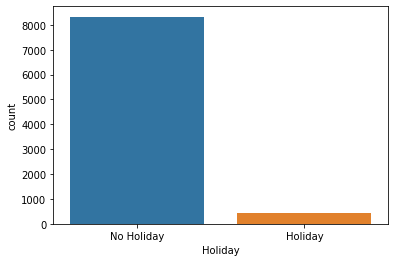

In [ ]:
sns.countplot(x = "Holiday", data=seoul_df1)

In [ ]:
sns.countplot(x = "Functioning Day", data=seoul_df1)

CONVERSION OF DATATYPES

In [ ]:
seoul_df1['Date'] = pd.to_datetime(seoul_df1['Date'])
seoul_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       8760 non-null   datetime64[ns]
 1   Rented Bike Count          8760 non-null   int64         
 2   Hour                       8760 non-null   int64         
 3   Temperature(°C)            8760 non-null   float64       
 4   Humidity(%)                8760 non-null   int64         
 5   Wind speed (m/s)           8760 non-null   float64       
 6   Visibility (10m)           8760 non-null   int64         
 7   Dew point temperature(°C)  8760 non-null   float64       
 8   Solar Radiation (MJ/m2)    8760 non-null   float64       
 9   Rainfall(mm)               8760 non-null   float64       
 10  Snowfall (cm)              8760 non-null   float64       
 11  Seasons                    8760 non-null   object        
 12  Holida

In [ ]:
seoul_df1.head(10).transpose()

0                    1  \
Date                       2017-01-12 00:00:00  2017-01-12 00:00:00   
Rented Bike Count                          254                  204   
Hour                                         0                    1   
Temperature(°C)                           -5.2                 -5.5   
Humidity(%)                                 37                   38   
Wind speed (m/s)                           2.2                  0.8   
Visibility (10m)                          2000                 2000   
Dew point temperature(°C)                -17.6                -17.6   
Solar Radiation (MJ/m2)                    0.0                  0.0   
Rainfall(mm)                               0.0                  0.0   
Snowfall (cm)                              0.0                  0.0   
Seasons                                 Winter               Winter   
Holiday                             No Holiday           No Holiday   
Functioning Day                            Yes                  Yes   

                                             2                    3  \
Date                       2017-01-12 00:00:00  2017-01-12 00:00:00   
Rented Bike Count                          173                  107   
Hour                                         2                    3   
Temperature(°C)                           -6.0                 -6.2   
Humidity(%)                                 39                   40   
Wind speed (m/s)                           1.0                  0.9   
Visibility (10m)                          2000                 2000   
Dew point temperature(°C)                -17.7                -17.6   
Solar Radiation (MJ/m2)                    0.0                  0.0   
Rainfall(mm)                               0.0                  0.0   
Snowfall (cm)                              0.0                  0.0   
Seasons                                 Winter               Winter   
Holiday                             No Holiday           No Holiday   
Functioning Day                            Yes                  Yes   

                                             4                    5  \
Date                       2017-01-12 00:00:00  2017-01-12 00:00:00   
Rented Bike Count                           78                  100   
Hour                                         4                    5   
Temperature(°C)                           -6.0                 -6.4   
Humidity(%)                                 36                   37   
Wind speed (m/s)                           2.3                  1.5   
Visibility (10m)                          2000                 2000   
Dew point temperature(°C)                -18.6                -18.7   
Solar Radiation (MJ/m2)                    0.0                  0.0   
Rainfall(mm)                               0.0                  0.0   
Snowfall (cm)                              0.0                  0.0   
Seasons                                 Winter               Winter   
Holiday                             No Holiday           No Holiday   
Functioning Day                            Yes                  Yes   

                                             6                    7  \
Date                       2017-01-12 00:00:00  2017-01-12 00:00:00   
Rented Bike Count                          181                  460   
Hour                                         6                    7   
Temperature(°C)                           -6.6                 -7.4   
Humidity(%)                                 35                   38   
Wind speed (m/s)                           1.3                  0.9   
Visibility (10m)                          2000                 2000   
Dew point temperature(°C)                -19.5                -19.3   
Solar Radiation (MJ/m2)                    0.0                  0.0   
Rainfall(mm)                               0.0                  0.0   
Snowfall (cm)                              0.0                  0.

In [ ]:
seoul_df1['Date'].describe(datetime_is_numeric=True).transpose()

count                   8760
mean     2018-06-01 00:00:00
min      2017-01-12 00:00:00
25%      2018-03-04 00:00:00
50%      2018-06-06 00:00:00
75%      2018-09-08 00:00:00
max      2018-12-11 00:00:00
Name: Date, dtype: object

In [ ]:
# Let's extract new columns (day of the week, day of the month, hour, month, season, year etc.) by using new index.
seoul_df1['Year'] = seoul_df1['Date'].dt.year
seoul_df1['Month'] = seoul_df1['Date'].dt.month
seoul_df1['Day'] = seoul_df1['Date'].dt.day
seoul_df1.tail()
seoul_df1.head(10).transpose()

0                    1  \
Date                       2017-01-12 00:00:00  2017-01-12 00:00:00   
Rented Bike Count                          254                  204   
Hour                                         0                    1   
Temperature(°C)                           -5.2                 -5.5   
Humidity(%)                                 37                   38   
Wind speed (m/s)                           2.2                  0.8   
Visibility (10m)                          2000                 2000   
Dew point temperature(°C)                -17.6                -17.6   
Solar Radiation (MJ/m2)                    0.0                  0.0   
Rainfall(mm)                               0.0                  0.0   
Snowfall (cm)                              0.0                  0.0   
Seasons                                 Winter               Winter   
Holiday                             No Holiday           No Holiday   
Functioning Day                            Yes                  Yes   
Year                                      2017                 2017   
Month                                        1                    1   
Day                                         12                   12   

                                             2                    3  \
Date                       2017-01-12 00:00:00  2017-01-12 00:00:00   
Rented Bike Count                          173                  107   
Hour                                         2                    3   
Temperature(°C)                           -6.0                 -6.2   
Humidity(%)                                 39                   40   
Wind speed (m/s)                           1.0                  0.9   
Visibility (10m)                          2000                 2000   
Dew point temperature(°C)                -17.7                -17.6   
Solar Radiation (MJ/m2)                    0.0                  0.0   
Rainfall(mm)                               0.0                  0.0   
Snowfall (cm)                              0.0                  0.0   
Seasons                                 Winter               Winter   
Holiday                             No Holiday           No Holiday   
Functioning Day                            Yes                  Yes   
Year                                      2017                 2017   
Month                                        1                    1   
Day                                         12                   12   

                                             4                    5  \
Date                       2017-01-12 00:00:00  2017-01-12 00:00:00   
Rented Bike Count                           78                  100   
Hour                                         4                    5   
Temperature(°C)                           -6.0                 -6.4   
Humidity(%)                                 36                   37   
Wind speed (m/s)                           2.3                  1.5   
Visibility (10m)                          2000                 2000   
Dew point temperature(°C)                -18.6                -18.7   
Solar Radiation (MJ/m2)                    0.0                  0.0   
Rainfall(mm)                               0.0                  0.0   
Snowfall (cm)                              0.0                  0.0   
Seasons                                 Winter               Winter   
Holiday                             No Holiday           No Holiday   
Functioning Day                            Yes                  Yes   
Year                                      2017                 2017   
Month                                        1                    1   
Day                                         12                   12   

                                             6                    7  \
Date                       2017-01-12 00:00:00  2017-01-12 00:00:00   
Rented Bike Count                          181                  46

OUTLIERS

In [ ]:
# identify outliers with interquartile range
from numpy.random import seed
from numpy.random import randn
from numpy import percentile

In [ ]:
# seed the random number generator
seed(1)
# calculate interquartile range
ws_q25, ws_q75 = percentile(seoul_df1['Wind speed (m/s)'], 25), percentile(seoul_df1['Wind speed (m/s)'], 75)
ws_iqr = ws_q75 - ws_q25
print('Percentiles: 25th=%.3f, 75th=%.3f, IQR=%.3f' % (ws_q25, ws_q75, ws_iqr))
# calculate the outlier cutoff
cut_off = ws_iqr * 1.5
lower, upper = ws_q25 - cut_off, ws_q75 + cut_off
# identify outliers
outliers = [x for x in seoul_df1['Wind speed (m/s)'] if x < lower or x > upper]
print('Identified outliers in Wind speed: %d' % len(outliers))
# remove outliers
outliers_removed = [x for x in seoul_df1['Wind speed (m/s)'] if x >= lower and x <= upper]
print('Non-outlier observations in Wind speed: %d' % len(outliers_removed))

Percentiles: 25th=0.900, 75th=2.300, IQR=1.400
Identified outliers in Wind speed: 161
Non-outlier observations in Wind speed: 8599


In [ ]:
# seed the random number generator
seed(1)
# calculate interquartile range
sr_q25, sr_q75 = percentile(seoul_df1['Solar Radiation (MJ/m2)'], 25), percentile(seoul_df1['Solar Radiation (MJ/m2)'], 75)
sr_iqr = sr_q75 - sr_q25
print('Percentiles: 25th=%.3f, 75th=%.3f, IQR=%.3f' % (sr_q25, sr_q75, sr_iqr))
# calculate the outlier cutoff
cut_off = sr_iqr * 1.5
lower, upper = sr_q25 - cut_off, sr_q75 + cut_off
# identify outliers
outliers = [x for x in seoul_df1['Solar Radiation (MJ/m2)'] if x < lower or x > upper]
print('Identified outliers in Solar Radiation: %d' % len(outliers))
# remove outliers
outliers_removed = [x for x in seoul_df1['Solar Radiation (MJ/m2)'] if x >= lower and x <= upper]
print('Non-outlier observations in Solar Radiation: %d' % len(outliers_removed))

Percentiles: 25th=0.000, 75th=0.930, IQR=0.930
Identified outliers in Solar Radiation: 641
Non-outlier observations in Solar Radiation: 8119


In [ ]:
# seed the random number generator
seed(1)
# calculate interquartile range
ra_q25, ra_q75 = percentile(seoul_df1['Rainfall(mm)'], 25), percentile(seoul_df1['Rainfall(mm)'], 75)
ra_iqr = ra_q75 - ra_q25
print('Percentiles: 25th=%.3f, 75th=%.3f, IQR=%.3f' % (ra_q25, ra_q75, ra_iqr))
# calculate the outlier cutoff
cut_off = ra_iqr * 1.5
lower, upper = ra_q25 - cut_off, ra_q75 + cut_off
# identify outliers
outliers = [x for x in seoul_df1['Rainfall(mm)'] if x < lower or x > upper]
print('Identified outliers in Rainfall: %d' % len(outliers))
# remove outliers
outliers_removed = [x for x in seoul_df1['Rainfall(mm)'] if x >= lower and x <= upper]
print('Non-outlier observations in Rainfall: %d' % len(outliers_removed))

Percentiles: 25th=0.000, 75th=0.000, IQR=0.000
Identified outliers in Rainfall: 528
Non-outlier observations in Rainfall: 8232


In [ ]:
# seed the random number generator
seed(1)
# calculate interquartile range
sn_q25, sn_q75 = percentile(seoul_df1['Snowfall (cm)'], 25), percentile(seoul_df1['Snowfall (cm)'], 75)
sn_iqr = sn_q75 - sn_q25
print('Percentiles: 25th=%.3f, 75th=%.3f, IQR=%.3f' % (sn_q25, sn_q75, sn_iqr))
# calculate the outlier cutoff
cut_off = sn_iqr * 1.5
lower, upper = sn_q25 - cut_off, sn_q75 + cut_off
# identify outliers
outliers = [x for x in seoul_df1['Snowfall (cm)'] if x < lower or x > upper]
print('Identified outliers in Snowfall: %d' % len(outliers))
# remove outliers
outliers_removed = [x for x in seoul_df1['Snowfall (cm)'] if x >= lower and x <= upper]
print('Non-outlier observations in Snowfall: %d' % len(outliers_removed))

Percentiles: 25th=0.000, 75th=0.000, IQR=0.000
Identified outliers in Snowfall: 443
Non-outlier observations in Snowfall: 8317


In [ ]:
# seed the random number generator
seed(1)
# calculate interquartile range
rbc_q25, rbc_q75 = percentile(seoul_df1['Rented Bike Count'], 25), percentile(seoul_df1['Rented Bike Count'], 75)
rbc_iqr = rbc_q75 - rbc_q25
print('Percentiles: 25th=%.3f, 75th=%.3f, IQR=%.3f' % (rbc_q25, rbc_q75, rbc_iqr))
# calculate the outlier cutoff
cut_off = rbc_iqr * 1.5
lower, upper = rbc_q25 - cut_off, rbc_q75 + cut_off
# identify outliers
outliers = [x for x in seoul_df1['Rented Bike Count'] if x < lower or x > upper]
print('Identified outliers in Rented Bike Count: %d' % len(outliers))
# remove outliers
outliers_removed = [x for x in seoul_df1['Rented Bike Count'] if x >= lower and x <= upper]
print('Non-outlier observations in Rented Bike Count: %d' % len(outliers_removed))

Percentiles: 25th=191.000, 75th=1065.250, IQR=874.250
Identified outliers in Rented Bike Count: 158
Non-outlier observations in Rented Bike Count: 8602


Remove Outliers

In [ ]:
seoul_out = seoul_df1.copy()


In [ ]:
seoul_out.columns=['Date','Rent_Bike_Count', 'Hour', 'Temperature', 'Humidity',
       'Wind_speed', 'Visibility', 'DPT',
       'Solar_Radiation', 'Rainfall', 'Snowfall', 'Seasons',
       'Holiday', 'Functioning_Day', 'Year', 'Month', 'Day']

In [ ]:
seoul_out.describe(include = 'all').transpose()

count unique                  top  freq      first  \
Date               8760    365  2017-01-12 00:00:00    24 2017-01-12   
Rent_Bike_Count  8760.0    NaN                  NaN   NaN        NaT   
Hour             8760.0    NaN                  NaN   NaN        NaT   
Temperature      8760.0    NaN                  NaN   NaN        NaT   
Humidity         8760.0    NaN                  NaN   NaN        NaT   
Wind_speed       8760.0    NaN                  NaN   NaN        NaT   
Visibility       8760.0    NaN                  NaN   NaN        NaT   
DPT              8760.0    NaN                  NaN   NaN        NaT   
Solar_Radiation  8760.0    NaN                  NaN   NaN        NaT   
Rainfall         8760.0    NaN                  NaN   NaN        NaT   
Snowfall         8760.0    NaN                  NaN   NaN        NaT   
Seasons            8760      4               Spring  2208        NaT   
Holiday            8760      2           No Holiday  8328        NaT   
Functioning_Day    8760      2                  Yes  8465        NaT   
Year             8760.0    NaN                  NaN   NaN        NaT   
Month            8760.0    NaN                  NaN   NaN        NaT   
Day              8760.0    NaN                  NaN   NaN        NaT   

                      last         mean         std     min     25%     50%  \
Date            2018-12-11          NaN         NaN     NaN     NaN     NaN   
Rent_Bike_Count        NaT   704.602055  644.997468     0.0   191.0   504.5   
Hour                   NaT         11.5    6.922582     0.0    5.75    11.5   
Temperature            NaT    12.882922   11.944825   -17.8     3.5    13.7   
Humidity               NaT    58.226256   20.362413     0.0    42.0    57.0   
Wind_speed             NaT     1.724909      1.0363     0.0     0.9     1.5   
Visibility             NaT  1436.825799  608.298712    27.0   940.0  1698.0   
DPT                    NaT     4.073813   13.060369   -30.6    -4.7     5.1   
Solar_Radiation        NaT     0.569111    0.868746     0.0     0.0    0.01   
Rainfall               NaT     0.148687    1.128193     0.0     0.0     0.0   
Snowfall               NaT     0.075068    0.436746     0.0     0.0     0.0   
Seasons                NaT          NaN         NaN     NaN     NaN     NaN   
Holiday                NaT          NaN         NaN     NaN     NaN     NaN   
Functioning_Day        NaT          NaN         NaN     NaN     NaN     NaN   
Year                   NaT  2017.915068    0.278796  2017.0  2018.0  2018.0   
Month                  NaT     6.526027    3.448048     1.0     4.0     7.0   
Day                    NaT    15.720548    8.796749     1.0     8.0    16.0   

                     75%     max  
Date                 NaN     NaN  
Rent_Bike_Count  1065.25  3556.0  
Hour               17.25    23.0  
Temperature         22.5    39.4  
Humidity            74.0    98.0  
Wind_speed           2.3     7.4  
Visibility        2000.0  2000.0  
DPT                 14.8    27.2  
Solar_Radiation     0.93    3.52  
Rainfall             0.0    35.0  
Snowfall             0.0     8.8  
Seasons              NaN     NaN  
Holiday              NaN     NaN  
Functioning_Day      NaN     NaN  
Year              2018.0  2018.0  
Month               10.0    12.0  
Day                 23.0    31.0

In [ ]:
# split the descriptive features from the target feature
seoul_x = seoul_out.drop(['Rent_Bike_Count'], axis=1)
seoul_y = seoul_out['Rent_Bike_Count']

In [ ]:
# Remove outliers from the variable Wind Speed
seoul_x = seoul_x.query('Wind_speed>= (@ws_q25 - @ws_iqr) & Wind_speed <= (@ws_q75 + @ws_iqr) ')
seoul_y = seoul_y[seoul_x.index]

# Remove outliers from the variable Solar radiation
seoul_x = seoul_x.query('Solar_Radiation>= (@sr_q25 - @sr_iqr) & Solar_Radiation <= (@sr_q75 + @sr_iqr) ')
seoul_y = seoul_y[seoul_x.index]

# Remove outliers from the variable rainfall
seoul_x = seoul_x.query('Rainfall>= (@ra_q25 - @ra_iqr) & Rainfall <= (@ra_q75 + @ra_iqr) ')
seoul_y = seoul_y[seoul_x.index]

# Remove outliers from the variable snowfall
seoul_x = seoul_x.query('Snowfall>= (@sn_q25 - @sn_iqr) & Snowfall <= (@sn_q75 + @sn_iqr) ')
seoul_y = seoul_y[seoul_x.index]


In [ ]:
# Remove outliers from the target variable rented bike count
seoul_x = seoul_x.query('Rent_Bike_Count>= (@rbc_q25 - @rbc_iqr) & Rent_Bike_Count <= (@rbc_q75 + @rbc_iqr) ')
seoul_y = seoul_y[seoul_x.index]

In [ ]:
seoul_x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6474 entries, 0 to 8759
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Date             6474 non-null   datetime64[ns]
 1   Hour             6474 non-null   int64         
 2   Temperature      6474 non-null   float64       
 3   Humidity         6474 non-null   int64         
 4   Wind_speed       6474 non-null   float64       
 5   Visibility       6474 non-null   int64         
 6   DPT              6474 non-null   float64       
 7   Solar_Radiation  6474 non-null   float64       
 8   Rainfall         6474 non-null   float64       
 9   Snowfall         6474 non-null   float64       
 10  Seasons          6474 non-null   object        
 11  Holiday          6474 non-null   object        
 12  Functioning_Day  6474 non-null   object        
 13  Year             6474 non-null   int64         
 14  Month            6474 non-null   int64  

In [ ]:
seoul_x['Rent_Bike_Count'] = seoul_y

In [ ]:
seoul_out1 = seoul_x.copy()

In [ ]:
seoul_out1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6474 entries, 0 to 8759
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Date             6474 non-null   datetime64[ns]
 1   Hour             6474 non-null   int64         
 2   Temperature      6474 non-null   float64       
 3   Humidity         6474 non-null   int64         
 4   Wind_speed       6474 non-null   float64       
 5   Visibility       6474 non-null   int64         
 6   DPT              6474 non-null   float64       
 7   Solar_Radiation  6474 non-null   float64       
 8   Rainfall         6474 non-null   float64       
 9   Snowfall         6474 non-null   float64       
 10  Seasons          6474 non-null   object        
 11  Holiday          6474 non-null   object        
 12  Functioning_Day  6474 non-null   object        
 13  Year             6474 non-null   int64         
 14  Month            6474 non-null   int64  

In [ ]:
seoul_out1.columns=['Date', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day', 'Year', 'Month', 'Day', 'Rented Bike Count']

In [ ]:
seoul_out1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6474 entries, 0 to 8759
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       6474 non-null   datetime64[ns]
 1   Hour                       6474 non-null   int64         
 2   Temperature(°C)            6474 non-null   float64       
 3   Humidity(%)                6474 non-null   int64         
 4   Wind speed (m/s)           6474 non-null   float64       
 5   Visibility (10m)           6474 non-null   int64         
 6   Dew point temperature(°C)  6474 non-null   float64       
 7   Solar Radiation (MJ/m2)    6474 non-null   float64       
 8   Rainfall(mm)               6474 non-null   float64       
 9   Snowfall (cm)              6474 non-null   float64       
 10  Seasons                    6474 non-null   object        
 11  Holiday                    6474 non-null   object        
 12  Functi

Explore newely made categorical descriptive features

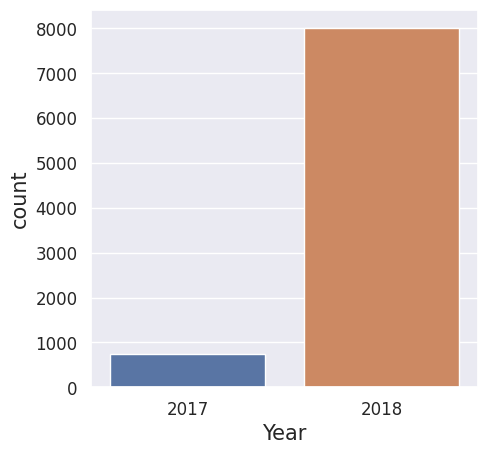

In [ ]:
plt.figure(figsize=(5,5), dpi=100);
sns.countplot(x="Year", data=seoul_df1)

In [ ]:
plt.figure(figsize=(6,6), dpi=100);

sns.countplot(x="Month", data=seoul_df1)

CORRELATION BETWEEN FEATURES

In [ ]:
plt.figure(figsize=(10,12), dpi=150);

sns.heatmap(seoul_df1.corr(),annot=True)

In [ ]:
plt.figure(figsize=(2,4), dpi=120)
sns.heatmap(seoul_df1.corr()[["Rented Bike Count"]].sort_values
            (by="Rented Bike Count", ascending=False)[1:],annot=True)

In [ ]:
# Plotting the bike shares per day in a given month
Day = seoul_df1.groupby("Day").sum().reset_index()
plt.figure(figsize=(16,4), dpi=120)
sns.barplot(x="Day", y="Rented Bike Count", data=Day)
plt.xticks(rotation=90);

In [ ]:
# Plotting the bike shares per month in a given year
Month = seoul_df1.groupby("Month").sum().reset_index()
plt.figure(figsize=(10,4), dpi=120)
sns.barplot(x="Month", y="Rented Bike Count", data=Month)
plt.xticks(rotation=90);

In [ ]:
# Plotting the bike shares per season in a given year
Season = seoul_df1.groupby("Seasons").sum().reset_index()
plt.figure(figsize=(6,4), dpi=100)
sns.barplot(x="Seasons", y="Rented Bike Count", data=Season)
plt.xticks(rotation=90);

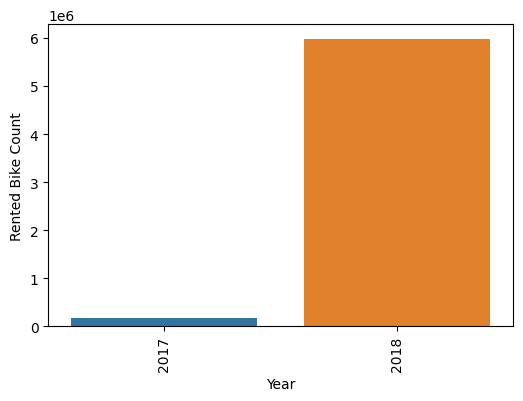

In [ ]:
# Plotting the bike shares per year

Years = seoul_df1.groupby("Year").sum().reset_index()
plt.figure(figsize=(6,4), dpi=100)
sns.barplot(x="Year", y="Rented Bike Count", data=Years)
plt.xticks(rotation=90);

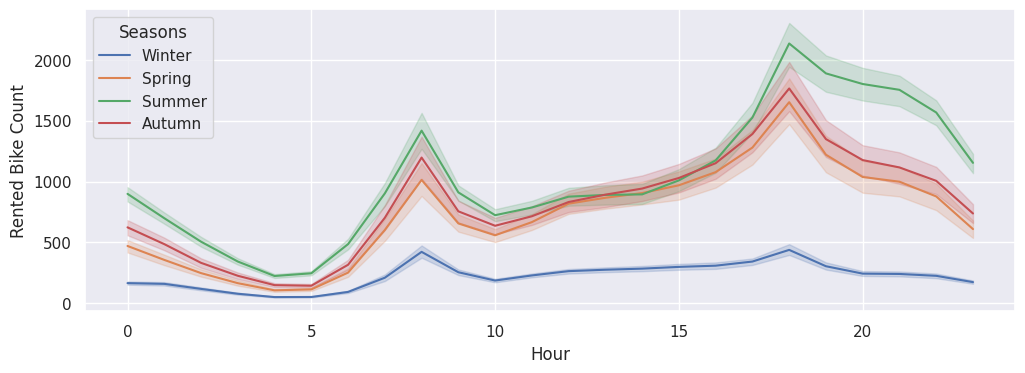

In [ ]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(12,4), dpi=100)
sns.lineplot(data=seoul_df1, x="Hour", y="Rented Bike Count", hue="Seasons")

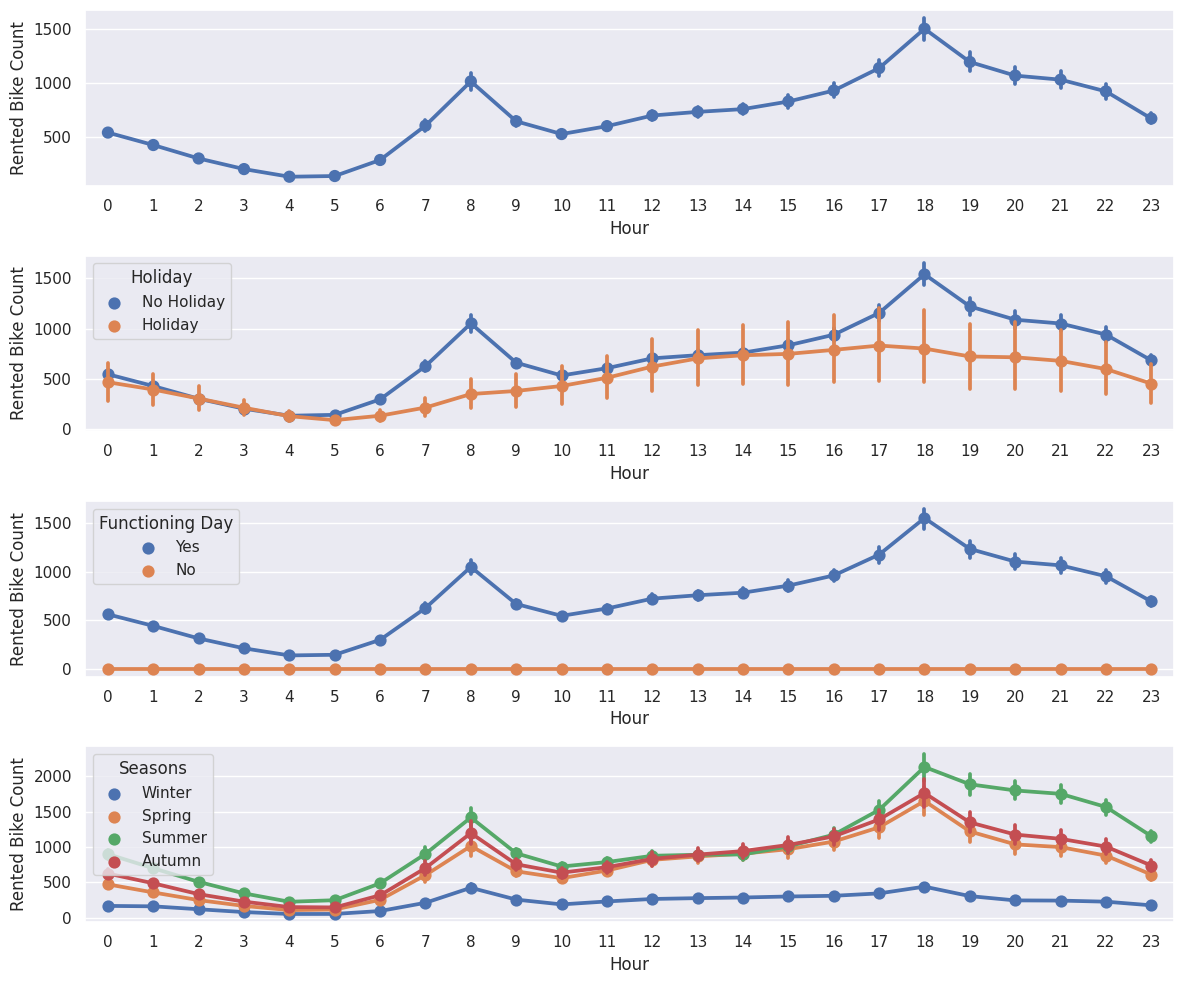

In [ ]:
# Effect of seasons, holidays and function day on the bike rentals per hour
sns.set_theme(style="darkgrid")

fig, axs = plt.subplots(nrows=4,ncols=1,figsize=(12,10), dpi=100)

sns.pointplot(data=seoul_df1, x="Hour", y="Rented Bike Count", ax=axs[0])
sns.pointplot(data=seoul_df1, x="Hour", y="Rented Bike Count", ax=axs[1],
              hue="Holiday")
sns.pointplot(data=seoul_df1, x="Hour", y="Rented Bike Count", ax=axs[2],
              hue="Functioning Day")
sns.pointplot(data=seoul_df1, x="Hour", y="Rented Bike Count", ax=axs[3],
              hue="Seasons")
plt.tight_layout()

In [ ]:
seoul_df2 = seoul_df1.copy()

In [ ]:
seoul_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       8760 non-null   datetime64[ns]
 1   Rented Bike Count          8760 non-null   int64         
 2   Hour                       8760 non-null   int64         
 3   Temperature(°C)            8760 non-null   float64       
 4   Humidity(%)                8760 non-null   int64         
 5   Wind speed (m/s)           8760 non-null   float64       
 6   Visibility (10m)           8760 non-null   int64         
 7   Dew point temperature(°C)  8760 non-null   float64       
 8   Solar Radiation (MJ/m2)    8760 non-null   float64       
 9   Rainfall(mm)               8760 non-null   float64       
 10  Snowfall (cm)              8760 non-null   float64       
 11  Seasons                    8760 non-null   object        
 12  Holida

In [ ]:
#Converting Contionus variable to categorical variable for ease in visualization and interpretation
seoul_df2['Visibility?']=seoul_df2['Visibility (10m)'].apply(lambda x: 1 if x>=1436 else 0)
seoul_df2['Rainfall?']=seoul_df2['Rainfall(mm)'].apply(lambda x:1 if x>=0.148687 else 0)
seoul_df2['Snowfall?']=seoul_df2['Snowfall (cm)'].apply(lambda x:1 if x>=0.075068 else 0)
seoul_df2['Solar Radiation?']=seoul_df2['Solar Radiation (MJ/m2)'].apply(lambda x:1 if x>=0.56911 else 0)

#Mapping the Variables
#seoul_df2['Functioning Day']=seoul_df2['Functioning Day'].map({'Yes':1,'No':0})
#seoul_df2['Holiday?']=seoul_df2['Holiday'].map({'No Holiday':0,'Holiday':1})
seoul_df2['Holiday?']=seoul_df2['Holiday']
seoul_df2['Visibility?']=seoul_df2['Visibility?'].map({0:'No',1:'Yes'})
seoul_df2['Rainfall?']=seoul_df2['Rainfall?'].map({0:'No',1:'Yes'})
seoul_df2['Snowfall?']=seoul_df2['Snowfall?'].map({0:'No',1:'Yes'})
seoul_df2['Solar Radiation?']=seoul_df2['Solar Radiation?'].map({0:'No',1:'Yes'})

#Ater Conversion of numerical variable to categorical droping the original columns to avoid ambiguity
seoul_df2.drop(['Date','Visibility (10m)','Rainfall(mm)','Snowfall (cm)','Solar Radiation (MJ/m2)','Holiday'],axis=1,inplace=True)

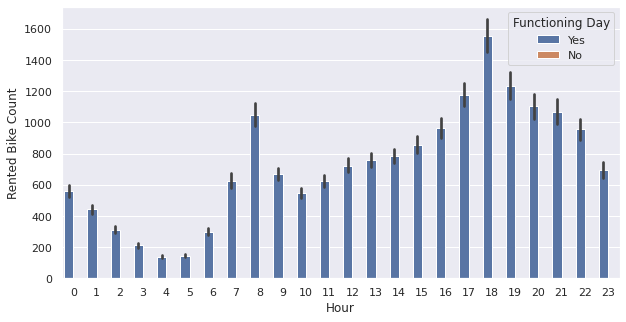

In [ ]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(10,5))
sns.barplot(x='Hour', y='Rented Bike Count', hue='Functioning Day', data=seoul_df2)

In [ ]:
def barplots(x,y,hue):
    plt.figure(figsize=(10,5))
    sns.barplot(x=x,y=y,hue=hue, data=seoul_df2);


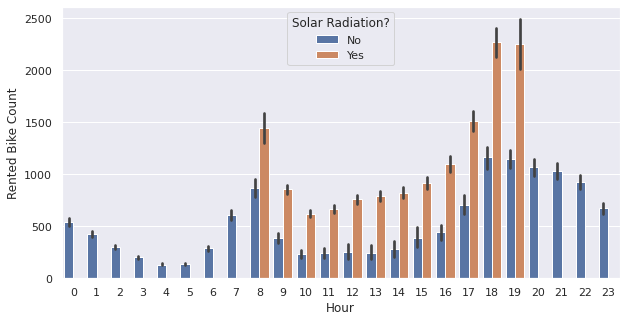

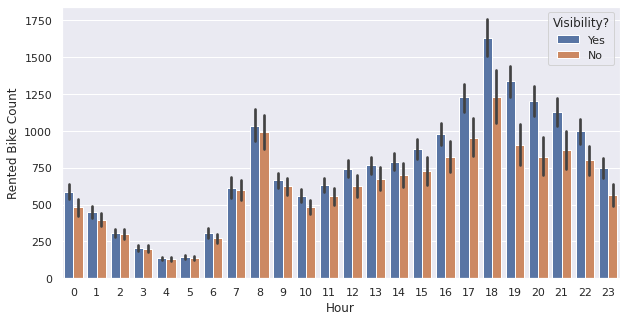

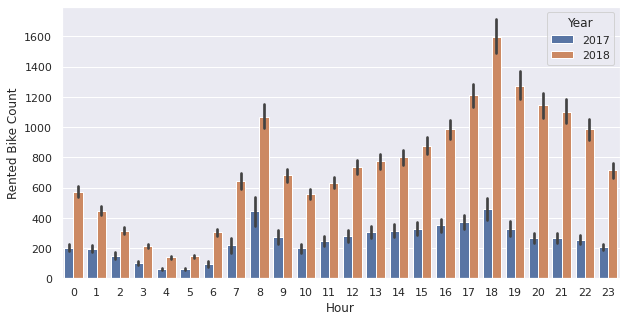

In [ ]:
hue=['Holiday?','Rainfall?','Snowfall?','Solar Radiation?','Visibility?', 'Year']
for i in hue:
    barplots('Hour','Rented Bike Count',i)
    plt.show()

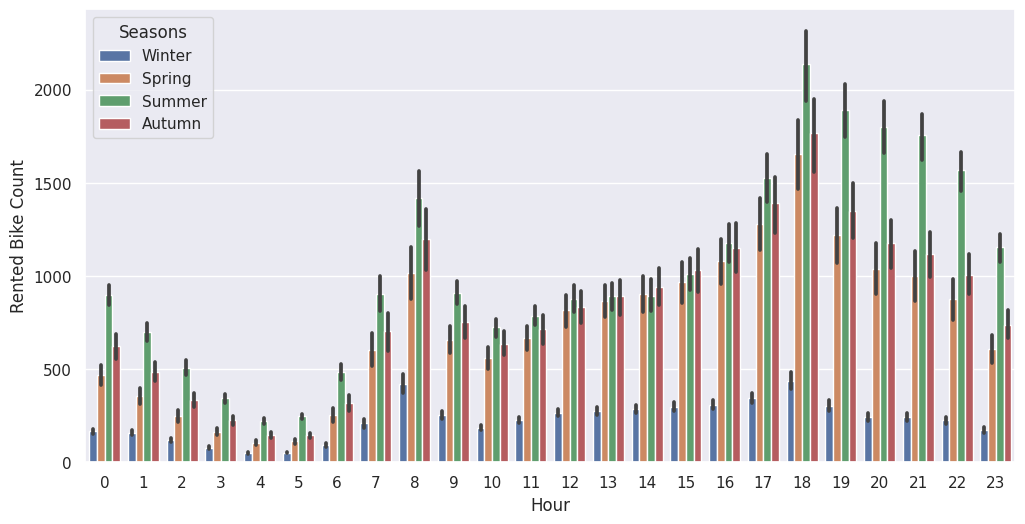

In [ ]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(12,6), dpi=100)
sns.barplot(x='Hour', y='Rented Bike Count', hue='Seasons', data=seoul_df2)

## **ALGORITHM IMPLEMENTATIONS**

## **REGRESSION DECISION TREE**

Feature Engineering Regression Decision Trees

In [ ]:
seoul_df3 = seoul_out1.copy()

In [ ]:
seoul_df3.head(10).transpose()

0                    1  \
Date                       2017-01-12 00:00:00  2017-01-12 00:00:00   
Hour                                         0                    1   
Temperature(°C)                           -5.2                 -5.5   
Humidity(%)                                 37                   38   
Wind speed (m/s)                           2.2                  0.8   
Visibility (10m)                          2000                 2000   
Dew point temperature(°C)                -17.6                -17.6   
Solar Radiation (MJ/m2)                    0.0                  0.0   
Rainfall(mm)                               0.0                  0.0   
Snowfall (cm)                              0.0                  0.0   
Seasons                                 Winter               Winter   
Holiday                             No Holiday           No Holiday   
Functioning Day                            Yes                  Yes   
Year                                      2017                 2017   
Month                                        1                    1   
Day                                         12                   12   
Rented Bike Count                          254                  204   

                                             2                    3  \
Date                       2017-01-12 00:00:00  2017-01-12 00:00:00   
Hour                                         2                    3   
Temperature(°C)                           -6.0                 -6.2   
Humidity(%)                                 39                   40   
Wind speed (m/s)                           1.0                  0.9   
Visibility (10m)                          2000                 2000   
Dew point temperature(°C)                -17.7                -17.6   
Solar Radiation (MJ/m2)                    0.0                  0.0   
Rainfall(mm)                               0.0                  0.0   
Snowfall (cm)                              0.0                  0.0   
Seasons                                 Winter               Winter   
Holiday                             No Holiday           No Holiday   
Functioning Day                            Yes                  Yes   
Year                                      2017                 2017   
Month                                        1                    1   
Day                                         12                   12   
Rented Bike Count                          173                  107   

                                             4                    5  \
Date                       2017-01-12 00:00:00  2017-01-12 00:00:00   
Hour                                         4                    5   
Temperature(°C)                           -6.0                 -6.4   
Humidity(%)                                 36                   37   
Wind speed (m/s)                           2.3                  1.5   
Visibility (10m)                          2000                 2000   
Dew point temperature(°C)                -18.6                -18.7   
Solar Radiation (MJ/m2)                    0.0                  0.0   
Rainfall(mm)                               0.0                  0.0   
Snowfall (cm)                              0.0                  0.0   
Seasons                                 Winter               Winter   
Holiday                             No Holiday           No Holiday   
Functioning Day                            Yes                  Yes   
Year                                      2017                 2017   
Month                                        1                    1   
Day                                         12                   12   
Rented Bike Count                           78                  100   

                                             6                    7  \
Date                       2017-01-12 00:00:00  2017-01-12 00:00:00   
Hour                                         6                    

In [ ]:
seoul_df3.shape

(6474, 17)

In [ ]:
# no rentals on a non functioning day, since it is not open for rentals. Removal of these entries
seoul_df3 = seoul_df3[seoul_df3['Functioning Day']!='No']
# Removal of non func column
seoul_df3 = seoul_df3.drop(['Functioning Day'], axis=1)

In [ ]:
seoul_df3.shape

(6233, 17)

In [ ]:
# Since the Date column has been expanded, the feature Date can be removed since it provides a redundancy
seoul_df3.drop('Date', axis=1, inplace=True)
# categorical columns
seoul_df3["Seasons"] = seoul_df3["Seasons"].astype('category')
seoul_df3["Year"] = seoul_df3["Year"].astype('category')

In [ ]:
seoul_df3.head(10).transpose()

0           1           2           3  \
Hour                                0           1           2           3   
Temperature(°C)                  -5.2        -5.5        -6.0        -6.2   
Humidity(%)                        37          38          39          40   
Wind speed (m/s)                  2.2         0.8         1.0         0.9   
Visibility (10m)                 2000        2000        2000        2000   
Dew point temperature(°C)       -17.6       -17.6       -17.7       -17.6   
Solar Radiation (MJ/m2)           0.0         0.0         0.0         0.0   
Rainfall(mm)                      0.0         0.0         0.0         0.0   
Snowfall (cm)                     0.0         0.0         0.0         0.0   
Seasons                        Winter      Winter      Winter      Winter   
Holiday                    No Holiday  No Holiday  No Holiday  No Holiday   
Year                             2017        2017        2017        2017   
Month                               1           1           1           1   
Day                                12          12          12          12   
Rented Bike Count                 254         204         173         107   

                                    4           5           6           7  \
Hour                                4           5           6           7   
Temperature(°C)                  -6.0        -6.4        -6.6        -7.4   
Humidity(%)                        36          37          35          38   
Wind speed (m/s)                  2.3         1.5         1.3         0.9   
Visibility (10m)                 2000        2000        2000        2000   
Dew point temperature(°C)       -18.6       -18.7       -19.5       -19.3   
Solar Radiation (MJ/m2)           0.0         0.0         0.0         0.0   
Rainfall(mm)                      0.0         0.0         0.0         0.0   
Snowfall (cm)                     0.0         0.0         0.0         0.0   
Seasons                        Winter      Winter      Winter      Winter   
Holiday                    No Holiday  No Holiday  No Holiday  No Holiday   
Year                             2017        2017        2017        2017   
Month                               1           1           1           1   
Day                                12          12          12          12   
Rented Bike Count                  78         100         181         460   

                                    8           9  
Hour                                8           9  
Temperature(°C)                  -7.6        -6.5  
Humidity(%)                        37          27  
Wind speed (m/s)                  1.1         0.5  
Visibility (10m)                 2000        1928  
Dew point temperature(°C)       -19.8       -22.4  
Solar Radiation (MJ/m2)          0.01        0.23  
Rainfall(mm)                      0.0         0.0  
Snowfall (cm)                     0.0         0.0  
Seasons                        Winter      Winter  
Holiday                    No Holiday  No Holiday  
Year                             2017        2017  
Month                               1           1  
Day                                12          12  
Rented Bike Count                 930         490

In [ ]:
# Inputs must be numerical
# Mapping the Variables
seoul_df3['Holiday']=seoul_df3['Holiday'].map({'No Holiday':0,'Holiday':1})

seoul_df3 = pd.get_dummies(seoul_df3,drop_first=True)

In [ ]:
seoul_df3.describe(include='all').transpose()

count         mean         std   min    25%  \
Hour                       6233.0    11.219798    7.443636   0.0    5.0   
Temperature(°C)            6233.0    12.298588   11.496604 -15.1    3.3   
Humidity(%)                6233.0    58.886732   18.484338   0.0   45.0   
Wind speed (m/s)           6233.0     1.514134    0.839378   0.0    0.9   
Visibility (10m)           6233.0  1455.633242  593.191189  27.0  973.0   
Dew point temperature(°C)  6233.0     3.904043   12.923452 -25.6   -5.3   
Solar Radiation (MJ/m2)    6233.0     0.302188    0.500459   0.0    0.0   
Rainfall(mm)               6233.0     0.000000    0.000000   0.0    0.0   
Snowfall (cm)              6233.0     0.000000    0.000000   0.0    0.0   
Holiday                    6233.0     0.046527    0.210639   0.0    0.0   
Month                      6233.0     6.587999    3.459095   1.0    4.0   
Day                        6233.0    15.648965    8.758179   1.0    8.0   
Rented Bike Count          6233.0   768.581261  671.100906   3.0  242.0   
Seasons_Spring             6233.0     0.245307    0.430304   0.0    0.0   
Seasons_Summer             6233.0     0.253971    0.435316   0.0    0.0   
Seasons_Winter             6233.0     0.249799    0.432932   0.0    0.0   
Year_2018                  6233.0     0.916252    0.277031   0.0    1.0   

                              50%      75%      max  
Hour                         10.0    18.00    23.00  
Temperature(°C)              12.2    21.80    39.00  
Humidity(%)                  59.0    73.00    98.00  
Wind speed (m/s)              1.4     2.10     3.60  
Visibility (10m)           1700.0  2000.00  2000.00  
Dew point temperature(°C)     4.4    14.90    26.10  
Solar Radiation (MJ/m2)       0.0     0.46     1.86  
Rainfall(mm)                  0.0     0.00     0.00  
Snowfall (cm)                 0.0     0.00     0.00  
Holiday                       0.0     0.00     1.00  
Month                         7.0    10.00    12.00  
Day                          15.0    23.00    31.00  
Rented Bike Count           554.0  1122.00  3556.00  
Seasons_Spring                0.0     0.00     1.00  
Seasons_Summer                0.0     1.00     1.00  
Seasons_Winter                0.0     0.00     1.00  
Year_2018                     1.0     1.00     1.00

Splitting data into train and test set for Regression Deceison Trees

In [ ]:
# split the descriptive features from the target feature
RT_seoul_x = seoul_df3.drop(['Rented Bike Count'], axis=1)
RT_seoul_y = seoul_df3['Rented Bike Count']

In [ ]:
# backward regression
Selected_Features = []
import statsmodels.api as sm

def backward_regression(X, y, initial_list=[], threshold_out=0.05, verbose=True):
    """To select feature with Backward Stepwise Regression

    Args:
        X -- features values
        y -- target variable
        initial_list -- features header
        threshold_out -- pvalue threshold of features to drop
        verbose -- true to produce lots of logging output

    Returns:
        list of selected features for modeling
    """
    included = list(X.columns)
    while True:
        changed = False
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max()  # null if pvalues is empty
        if worst_pval > threshold_out:
            changed = True
            worst_feature = pvalues.idxmax()
            included.remove(worst_feature)
            if verbose:
                print(f"worst_feature : {worst_feature}, {worst_pval} ")
        if not changed:
            break
    Selected_Features.append(included)
    print(f"\nSelected Features:\n{Selected_Features[0]}")


# Application of the backward regression function on our training data
backward_regression(RT_seoul_x, RT_seoul_y)

worst_feature : Month, 0.7754267267877026 
worst_feature : Dew point temperature(°C), 0.6377315574851407 
worst_feature : Solar Radiation (MJ/m2), 0.5061879064568275 
worst_feature : Rainfall(mm), 0.6589426972452823 
worst_feature : Visibility (10m), 0.38159400001082877 

Selected Features:
['Hour', 'Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)', 'Snowfall (cm)', 'Holiday', 'Day', 'Seasons_Spring', 'Seasons_Summer', 'Seasons_Winter', 'Year_2018']


In [ ]:
# Keep the selected features only
RT_seoul_x = RT_seoul_x.loc[:, Selected_Features[0]]

In [ ]:
# 30% test & 70% train
RT_train_X, RT_test_X, RT_train_Y, RT_test_Y = train_test_split(RT_seoul_x, RT_seoul_y, test_size=0.3, random_state=20)

In [ ]:
print("Magnitude of the descriptive training features:", RT_train_X.shape)
print("Magnitude of the target training features:", RT_train_Y.shape)
print("\nMagnitude of the descriptive test features:", RT_test_X.shape)
print("Magnitude of the target test features:", RT_test_Y.shape)

Magnitude of the descriptive training features: (4363, 11)
Magnitude of the target training features: (4363,)

Magnitude of the descriptive test features: (1870, 11)
Magnitude of the target test features: (1870,)


## **Inducing Regression Decision Tree**

In [ ]:
reg_tree = DecisionTreeRegressor(criterion='squared_error', random_state=17)

reg_tree.fit(RT_train_X, RT_train_Y)
reg_tree_pred = reg_tree.predict(RT_test_X)
reg_tree_pred1 = reg_tree.predict(RT_train_X)

# Evaluating model performance on train data
print('Accuracy on training: '+ "{:.2%}".format(reg_tree.score(RT_train_X,RT_train_Y)))
print('Mean Squared Error on training: '+ "{:.2f}".format(mean_squared_error(RT_train_Y,reg_tree_pred1,squared=False)))
print('Mean Absolute Error on training: '+ "{:.2f}".format(mean_absolute_error(RT_train_Y,reg_tree_pred1)))

# Evaluating model performance on test data
print('Accuracy on test: '+ "{:.2%}".format(reg_tree.score(RT_test_X,RT_test_Y)))
print('Mean Squared Error on test: '+ "{:.2f}".format(mean_squared_error(RT_test_Y,reg_tree_pred,squared=False)))
print('Mean Absolute Error on test: '+ "{:.2f}".format(mean_absolute_error(RT_test_Y,reg_tree_pred)))

Accuracy on training: 100.00%
Mean Squared Error on training: 0.00
Mean Absolute Error on training: 0.00
Accuracy on test: 74.19%
Mean Squared Error on test: 332.31
Mean Absolute Error on test: 198.44


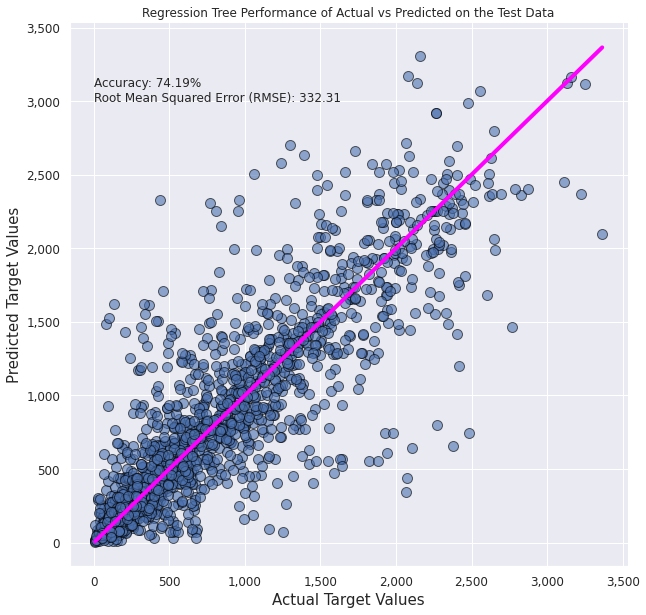

In [ ]:
sns.set_theme(style="darkgrid")
plt.rcParams['figure.figsize']=10,10
plt.rcParams['lines.linewidth'] = 3
plt.rcParams['axes.labelsize']=15
plt.rcParams['xtick.labelsize']=12
plt.rcParams['ytick.labelsize']=12
plt.rcParams['legend.fontsize']=12

fig,ax = plt.subplots()
plt.title('Regression Tree Performance of Actual vs Predicted on the Test Data')
plt.xlabel('Actual Target Values')
plt.ylabel('Predicted Target Values')
g = sns.scatterplot(x=RT_test_Y,
                y=reg_tree_pred,
                s=100,
                alpha=0.6,
                linewidth=1,
                edgecolor='black',
                ax=ax)
f = sns.lineplot(x=[min(RT_test_Y),max(RT_test_Y)],
             y=[min(RT_test_Y),max(RT_test_Y)],
             linewidth=4,
             color='magenta',
             ax=ax)
text = ('Accuracy: '+ "{:.2%}".format(reg_tree.score(RT_test_X,RT_test_Y)) +'\n' +
                  'Root Mean Squared Error (RMSE): '+ "{:.2f}".format(mean_squared_error(RT_test_Y,reg_tree_pred,squared=False)))
plt.annotate(text, xy=(0,3000), size='medium')

xlabels = ['{:,.0f}'.format(x) for x in g.get_xticks()]
g.set_xticklabels(xlabels)
ylabels = ['{:,.0f}'.format(x) for x in g.get_yticks()]
g.set_yticklabels(ylabels)
sns.despine()

In [ ]:
RT_train_X.columns

Index(['Hour', 'Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)',
       'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Holiday',
       'Functioning Day', 'Year', 'Month', 'Day', 'Seasons_Spring',
       'Seasons_Summer', 'Seasons_Winter'],
      dtype='object')

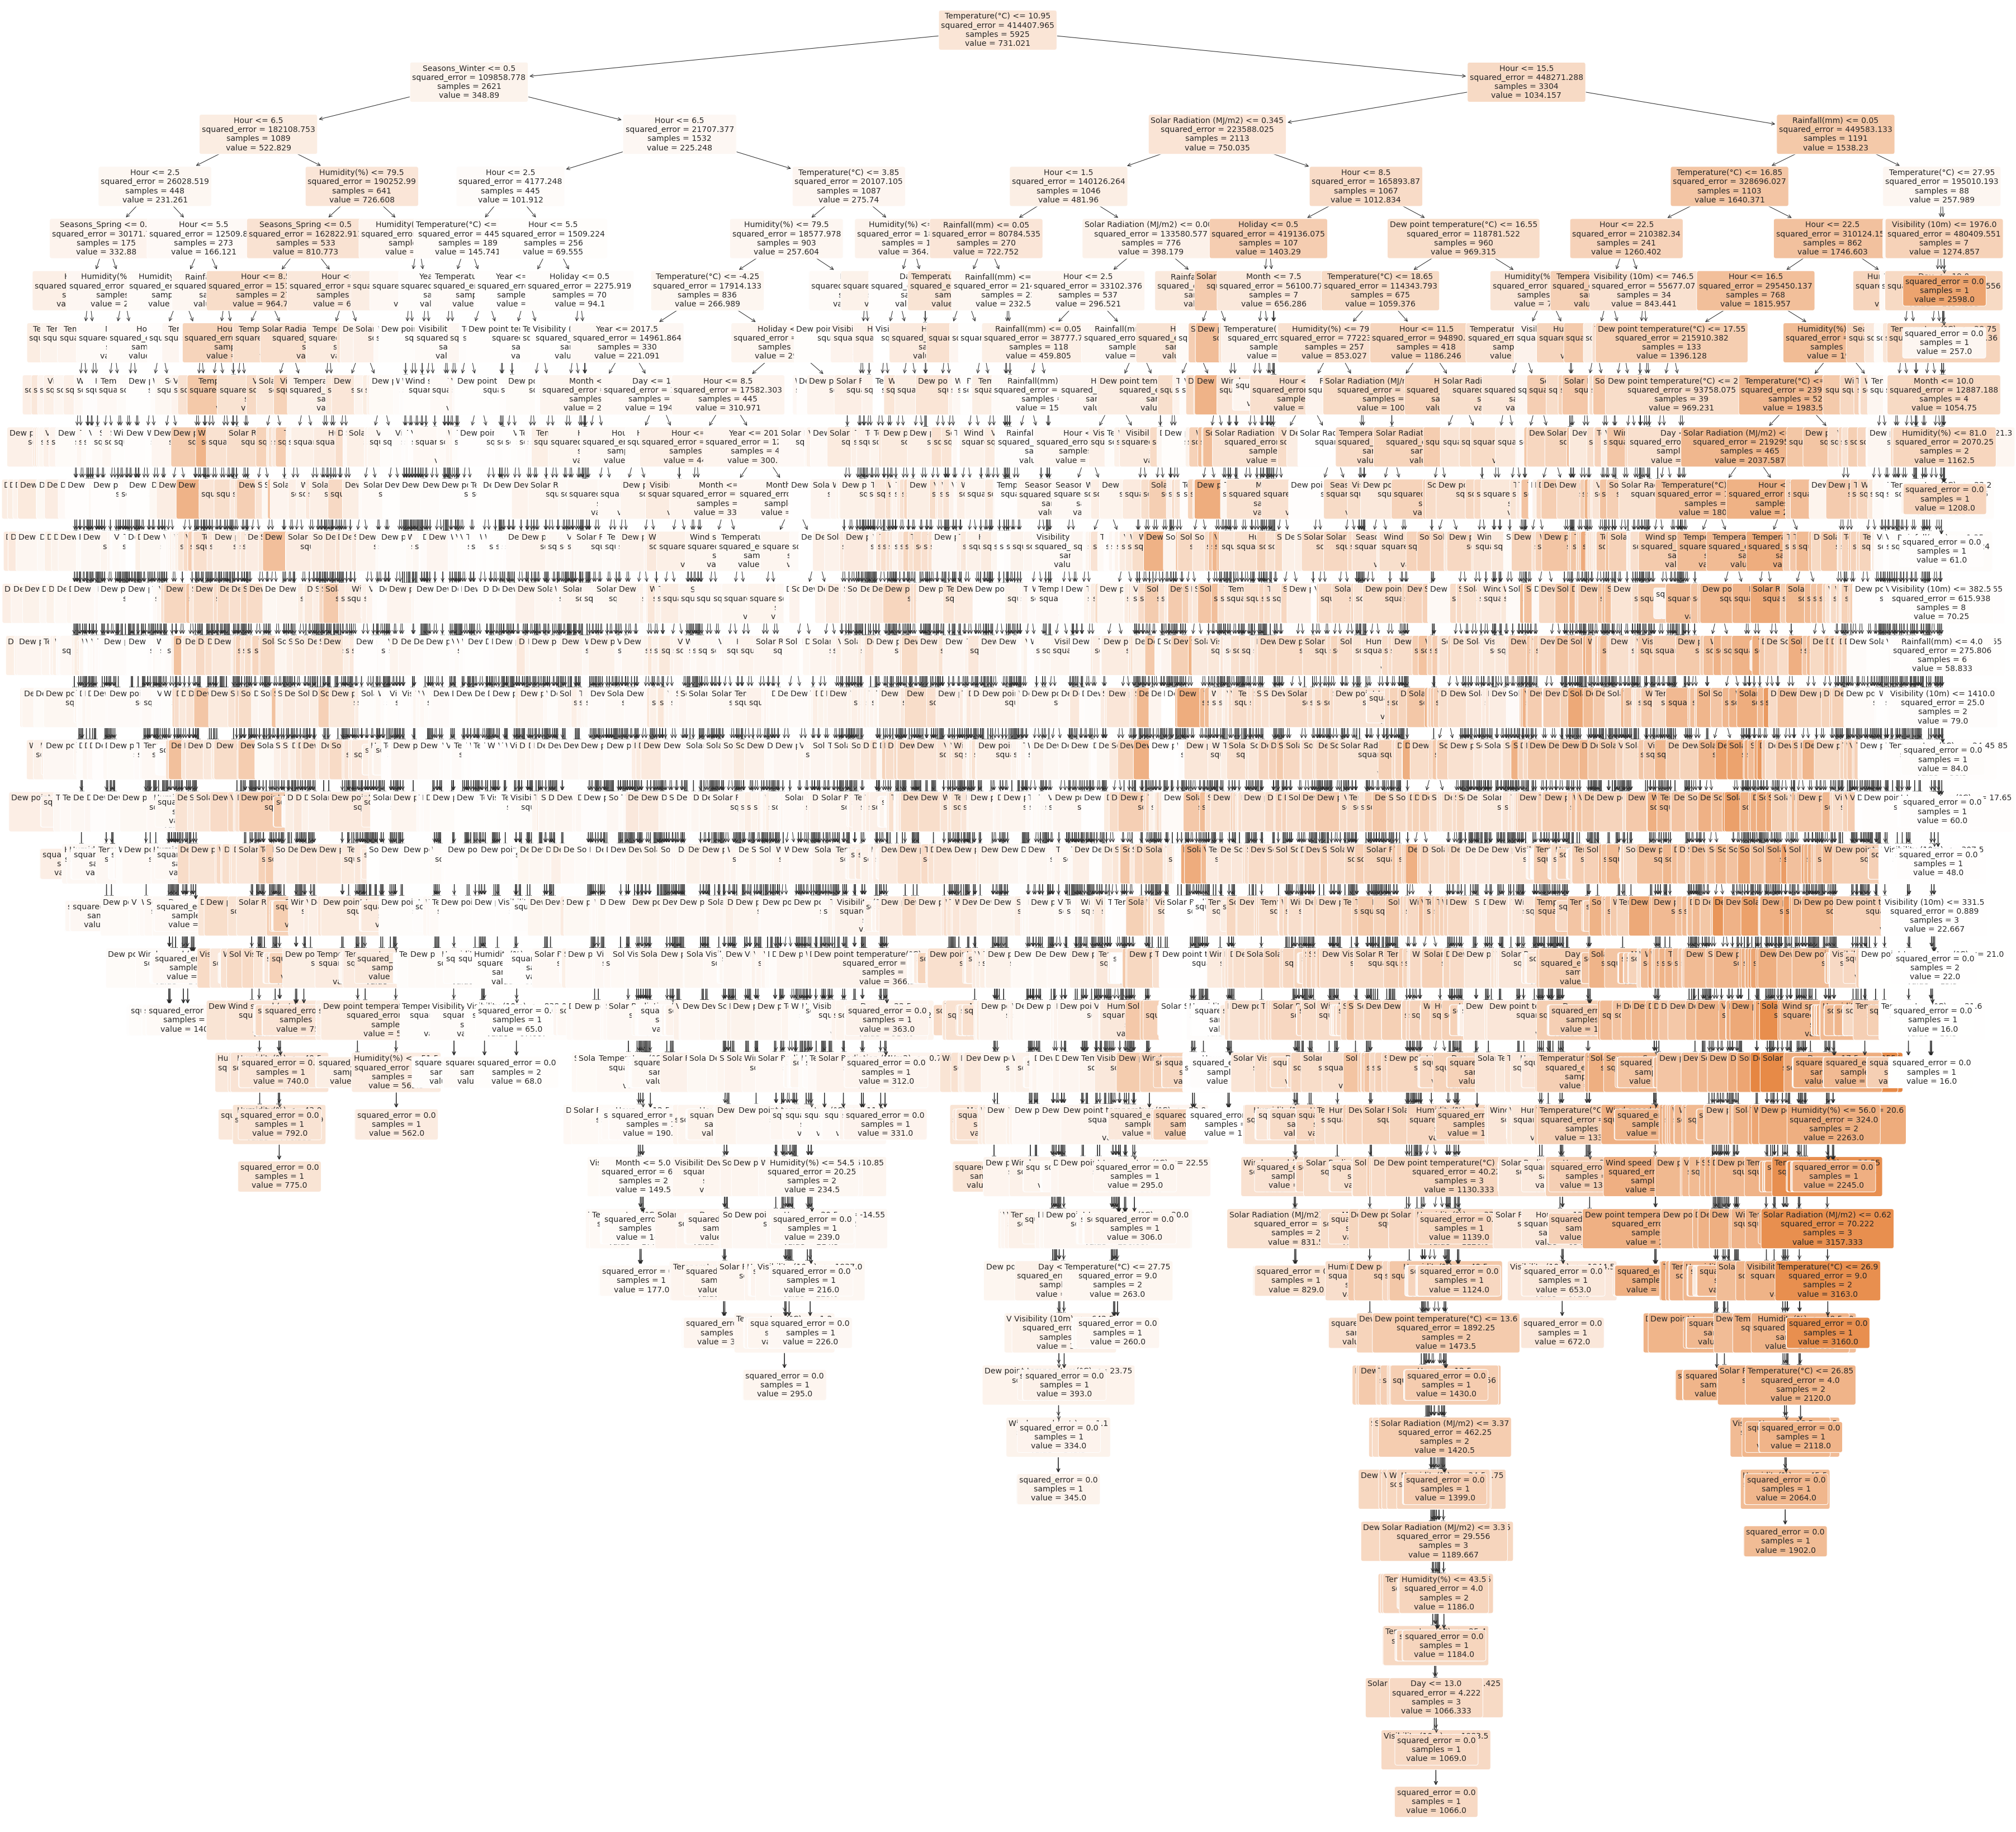

In [ ]:
# visualizing the tree
plt.figure(figsize=(60,60), facecolor ='white') #create the tree plot
train_tree1 = tree.plot_tree(reg_tree,
                   # use the feature names for train set stored
                   feature_names = RT_train_X.columns,
                   # use the class names for train set stored
                   class_names = RT_train_Y,
                   rounded = True,
                   filled = True,
                   fontsize=14) # display the plot
plt.show()

**PRUNING**

Text(0, 0.5, 'Mean Square Error (RMSE) value')

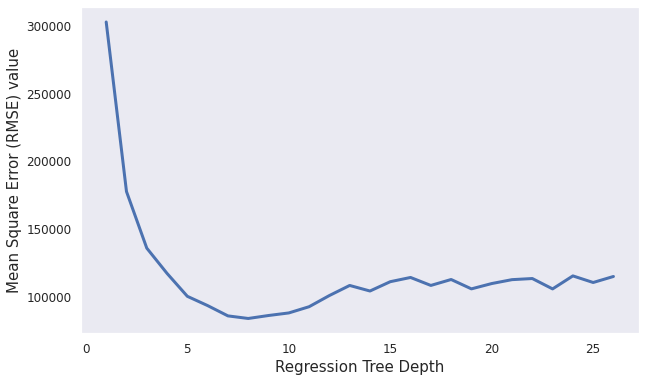

In [ ]:
# Determining best tree depth
mses = []
for depth in range(1, (reg_tree.tree_.max_depth + 1)):
    d_tree_reg = DecisionTreeRegressor(max_depth=depth)
    d_tree_reg.fit(RT_train_X, RT_train_Y)
    tree_predictions = d_tree_reg.predict(RT_test_X)
    mses.append(mean_squared_error(RT_test_Y, tree_predictions))

tree_depths = [depth for depth in range(1, (reg_tree.tree_.max_depth + 1))]
plt.figure(figsize=(10,  6))
plt.grid()
plt.plot(tree_depths, mses)
plt.xlabel("Regression Tree Depth")
plt.ylabel("Mean Square Error (RMSE) value")

findfont: Font family ['Calibri'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Calibri'] not found. Falling back to DejaVu Sans.


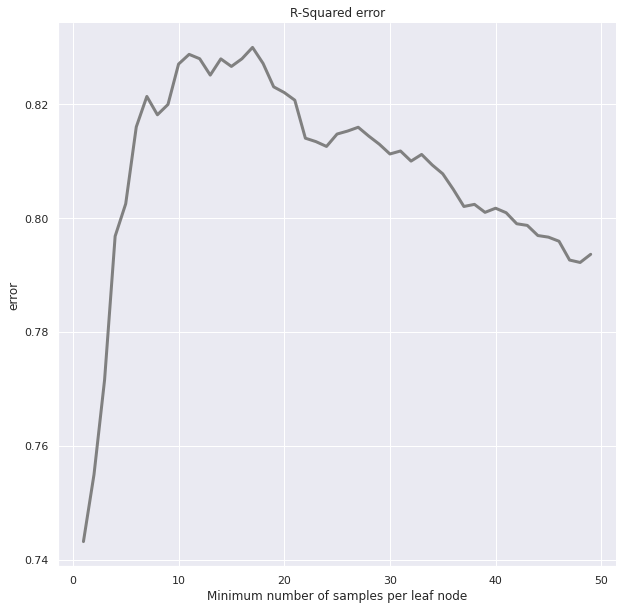

In [ ]:
# Determining best number of minimum samples in leaf nodes
R2E = []
RMSE = []

for nr in range(1,50):
    model = DecisionTreeRegressor(min_samples_leaf=nr
                                  ).fit(RT_train_X,RT_train_Y)
    y_predictions = model.predict(RT_test_X) # These are the predictions from the test data.
    R2E.append(model.score(RT_test_X,RT_test_Y))
    RMSE.append(mean_squared_error(RT_test_Y,reg_tree_pred,squared=False))

sns.set_theme(style="darkgrid")
plt.rcParams['figure.figsize']=10,10
plt.rcParams['font.family'] = 'Calibri'
plt.rcParams['lines.linewidth'] = 3
plt.rcParams['font.size']=16

fig,ax = plt.subplots()
plt.title('R-Squared error')
plt.ylabel('error')
plt.xlabel('Minimum number of samples per leaf node')

f = sns.lineplot(x=range(1,50),
             y=R2E,
             linewidth=3,
             color='gray',
             ax=ax,
                )


sns.despine()

R-squared error on training data for pruned tree: 87.49%
Root Mean Squared Error on training for pruned tree: 239.90
R-squared error on test for pruned tree: 80.30%
Root Mean Squared Error on test for pruned tree: 290.31


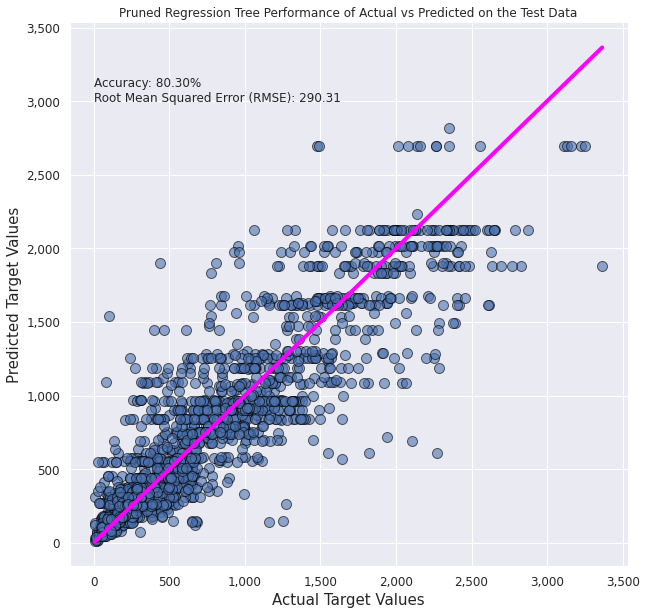

In [ ]:
# Optimum tree length when depth is 9 trees
reg_tree = DecisionTreeRegressor(criterion='squared_error', max_depth = 8, random_state=17)

reg_tree.fit(RT_train_X, RT_train_Y)
reg_tree_pred = reg_tree.predict(RT_test_X)
reg_tree_pred1 = reg_tree.predict(RT_train_X)

# Evaluating model performance on train data
print('R-squared error on training data for pruned tree: '+ "{:.2%}".format(reg_tree.score(RT_train_X,RT_train_Y)))
print('Root Mean Squared Error on training for pruned tree: '+ "{:.2f}".format(mean_squared_error(RT_train_Y,reg_tree_pred1,squared=False)))

# Evaluating model performance on test data
print('R-squared error on test for pruned tree: '+ "{:.2%}".format(reg_tree.score(RT_test_X,RT_test_Y)))
print('Root Mean Squared Error on test for pruned tree: '+ "{:.2f}".format(mean_squared_error(RT_test_Y,reg_tree_pred,squared=False)))

sns.set_theme(style="darkgrid")
plt.rcParams['figure.figsize']=10,10
plt.rcParams['lines.linewidth'] = 3
plt.rcParams['axes.labelsize']=15
plt.rcParams['xtick.labelsize']=12
plt.rcParams['ytick.labelsize']=12
plt.rcParams['legend.fontsize']=12

fig,ax = plt.subplots()
plt.title('Pruned Regression Tree Performance of Actual vs Predicted on the Test Data')
plt.xlabel('Actual Target Values')
plt.ylabel('Predicted Target Values')
g = sns.scatterplot(x=RT_test_Y,
                y=reg_tree_pred,
                s=100,
                alpha=0.6,
                linewidth=1,
                edgecolor='black',
                ax=ax)
f = sns.lineplot(x=[min(RT_test_Y),max(RT_test_Y)],
             y=[min(RT_test_Y),max(RT_test_Y)],
             linewidth=4,
             color='magenta',
             ax=ax)
text = ('Accuracy: '+ "{:.2%}".format(reg_tree.score(RT_test_X,RT_test_Y)) +'\n' +
                  'Mean Squared Error (RMSE): '+ "{:.2f}".format(mean_squared_error(RT_test_Y,reg_tree_pred,squared=False)))
plt.annotate(text, xy=(0,3000), size='medium')

xlabels = ['{:,.0f}'.format(x) for x in g.get_xticks()]
g.set_xticklabels(xlabels)
ylabels = ['{:,.0f}'.format(x) for x in g.get_yticks()]
g.set_yticklabels(ylabels)
sns.despine()

In [ ]:
mean_absolute_error(RT_test_Y,reg_tree_pred)

188.98227481084265

In [ ]:
mean_absolute_error(RT_train_Y,reg_tree_pred1)

150.87388956318557

## **REGRESSION K-NEAREST NEIGHBOUR**

KNN Feature Engineering Requirements - Input features must be numeric

In [ ]:
seoul_df4 = seoul_df3.copy()

In [ ]:
# Only for KNN
# Inputs must be numerical
# Mapping the Variables
seoul_df4['Functioning Day']=seoul_df4['Functioning Day'].map({'Yes':1,'No':0})
seoul_df4['Holiday']=seoul_df4['Holiday'].map({'No Holiday':0,'Holiday':1})

In [ ]:
# no rentals on a non functioning day, since it is not open for rentals. Removal of these entries
seoul_df4 = seoul_df4[seoul_df4['Functioning Day']!=0]

In [ ]:
seoul_df4 = pd.get_dummies(seoul_df4,drop_first=True)

In [ ]:
seoul_df4.drop('Date', axis=1, inplace=True)

In [ ]:
seoul_df4.describe(include='all').transpose()

count         mean         std   min    25%  \
Hour                       6233.0    11.219798    7.443636   0.0    5.0   
Temperature(°C)            6233.0    12.298588   11.496604 -15.1    3.3   
Humidity(%)                6233.0    58.886732   18.484338   0.0   45.0   
Wind speed (m/s)           6233.0     1.514134    0.839378   0.0    0.9   
Visibility (10m)           6233.0  1455.633242  593.191189  27.0  973.0   
Dew point temperature(°C)  6233.0     3.904043   12.923452 -25.6   -5.3   
Solar Radiation (MJ/m2)    6233.0     0.302188    0.500459   0.0    0.0   
Rainfall(mm)               6233.0     0.000000    0.000000   0.0    0.0   
Snowfall (cm)              6233.0     0.000000    0.000000   0.0    0.0   
Holiday                    6233.0     0.046527    0.210639   0.0    0.0   
Month                      6233.0     6.587999    3.459095   1.0    4.0   
Day                        6233.0    15.648965    8.758179   1.0    8.0   
Rented Bike Count          6233.0   768.581261  671.100906   3.0  242.0   
Seasons_Spring             6233.0     0.245307    0.430304   0.0    0.0   
Seasons_Summer             6233.0     0.253971    0.435316   0.0    0.0   
Seasons_Winter             6233.0     0.249799    0.432932   0.0    0.0   
Year_2018                  6233.0     0.916252    0.277031   0.0    1.0   

                              50%      75%      max  
Hour                         10.0    18.00    23.00  
Temperature(°C)              12.2    21.80    39.00  
Humidity(%)                  59.0    73.00    98.00  
Wind speed (m/s)              1.4     2.10     3.60  
Visibility (10m)           1700.0  2000.00  2000.00  
Dew point temperature(°C)     4.4    14.90    26.10  
Solar Radiation (MJ/m2)       0.0     0.46     1.86  
Rainfall(mm)                  0.0     0.00     0.00  
Snowfall (cm)                 0.0     0.00     0.00  
Holiday                       0.0     0.00     1.00  
Month                         7.0    10.00    12.00  
Day                          15.0    23.00    31.00  
Rented Bike Count           554.0  1122.00  3556.00  
Seasons_Spring                0.0     0.00     1.00  
Seasons_Summer                0.0     1.00     1.00  
Seasons_Winter                0.0     0.00     1.00  
Year_2018                     1.0     1.00     1.00

Splitting data into train and test set for KNN



In [ ]:
knn_seoul_x = seoul_df4.drop(['Rented Bike Count'], axis=1)
knn_seoul_y = seoul_df4['Rented Bike Count']

In [ ]:
# 30% test & 70% train
knn_train_X, knn_test_X, knn_train_Y, knn_test_Y = train_test_split(knn_seoul_x, knn_seoul_y, test_size=0.3, random_state=20)

In [ ]:
print("Magnitude of the descriptive training features:", knn_train_X.shape)
print("Magnitude of the target training features:", knn_train_Y.shape)
print("\nMagnitude of the descriptive test features:", knn_test_X.shape)
print("Magnitude of the target test features:", knn_test_Y.shape)

Magnitude of the descriptive training features: (4363, 16)
Magnitude of the target training features: (4363,)

Magnitude of the descriptive test features: (1870, 16)
Magnitude of the target test features: (1870,)


NORMALIZATION OF NUMERIC FEATURES

In [ ]:
# Normalize the data for knn implementation

# returns a numpy array of the dataframe
knn_train_X = knn_train_X.values
knn_test_X = knn_test_X.values

min_max_scaler = preprocessing.MinMaxScaler()

# scale features
x_train_knorm = min_max_scaler.fit_transform(knn_train_X)
x_test_knorm = min_max_scaler.fit_transform(knn_test_X)

# return to dataframe form
#knn_train_X = pd.DataFrame(x_train_knorm)
#knn_test_X = pd.DataFrame(x_test_knorm)

In [ ]:
knn_train_X.describe(include='all').transpose()

count      mean       std  min       25%       50%       75%  max
0   4363.0  0.484380  0.323715  0.0  0.173913  0.434783  0.782609  1.0
1   4363.0  0.518116  0.218321  0.0  0.346226  0.518868  0.700000  1.0
2   4363.0  0.603456  0.188027  0.0  0.459184  0.602041  0.744898  1.0
3   4363.0  0.419786  0.234786  0.0  0.222222  0.388889  0.583333  1.0
4   4363.0  0.722895  0.300458  0.0  0.479980  0.842879  1.000000  1.0
5   4363.0  0.572926  0.251215  0.0  0.388781  0.582205  0.789168  1.0
6   4363.0  0.160306  0.266137  0.0  0.000000  0.000000  0.241935  1.0
7   4363.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000  0.0
8   4363.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000  0.0
9   4363.0  0.049507  0.216949  0.0  0.000000  0.000000  0.000000  1.0
10  4363.0  0.508282  0.314010  0.0  0.272727  0.545455  0.818182  1.0
11  4363.0  0.486836  0.291956  0.0  0.233333  0.466667  0.733333  1.0
12  4363.0  0.244786  0.430009  0.0  0.000000  0.000000  0.000000  1.0
13  4363.0  0.256704  0.436865  0.0  0.000000  0.000000  1.000000  1.0
14  4363.0  0.247994  0.431898  0.0  0.000000  0.000000  0.000000  1.0
15  4363.0  0.917946  0.274478  0.0  1.000000  1.000000  1.000000  1.0

In [ ]:
knn_test_X.describe(include='all').transpose()

count      mean       std  min       25%       50%       75%  max
0   1870.0  0.495838  0.323398  0.0  0.217391  0.434783  0.826087  1.0
1   1870.0  0.503788  0.209295  0.0  0.341959  0.499076  0.670980  1.0
2   1870.0  0.594887  0.189896  0.0  0.448980  0.591837  0.744898  1.0
3   1870.0  0.422475  0.229374  0.0  0.250000  0.388889  0.583333  1.0
4   1870.0  0.721378  0.307247  0.0  0.468588  0.853413  1.000000  1.0
5   1870.0  0.563744  0.247987  0.0  0.394660  0.570874  0.768932  1.0
6   1870.0  0.167509  0.275778  0.0  0.000000  0.000000  0.252688  1.0
7   1870.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000  0.0
8   1870.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000  0.0
9   1870.0  0.039572  0.195004  0.0  0.000000  0.000000  0.000000  1.0
10  1870.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000  0.0
11  1870.0  0.912299  0.282935  0.0  1.000000  1.000000  1.000000  1.0
12  1870.0  0.507341  0.315601  0.0  0.181818  0.545455  0.818182  1.0
13  1870.0  0.491711  0.291950  0.0  0.233333  0.500000  0.733333  1.0
14  1870.0  0.246524  0.431102  0.0  0.000000  0.000000  0.000000  1.0
15  1870.0  0.247594  0.431730  0.0  0.000000  0.000000  0.000000  1.0
16  1870.0  0.254011  0.435420  0.0  0.000000  0.000000  1.000000  1.0

## **Regression K-Nearest Neighbour Implementation**

RMSE value for k=  1 is: 531.0318565023391
RMSE value for k=  2 is: 459.14888871187264
RMSE value for k=  3 is: 444.88818713168445
RMSE value for k=  4 is: 430.6341071699052
RMSE value for k=  5 is: 427.0001472779618
RMSE value for k=  6 is: 424.8710113754403
RMSE value for k=  7 is: 424.7801731141834
RMSE value for k=  8 is: 423.6679392448571
RMSE value for k=  9 is: 422.1862898445106
RMSE value for k=  10 is: 424.3339295342887
RMSE value for k=  11 is: 422.77428697114266
RMSE value for k=  12 is: 422.885365046415
RMSE value for k=  13 is: 422.4701846729927
RMSE value for k=  14 is: 423.8217706376083
RMSE value for k=  15 is: 424.50246460431725
RMSE value for k=  16 is: 426.13416043748634
RMSE value for k=  17 is: 426.9174739084107
RMSE value for k=  18 is: 428.4836454225524
RMSE value for k=  19 is: 429.7112508423973
RMSE value for k=  20 is: 431.67772450857177
RMSE value for k=  21 is: 433.05720140345215
RMSE value for k=  22 is: 434.55307627290534
RMSE value for k=  23 is: 435.4065

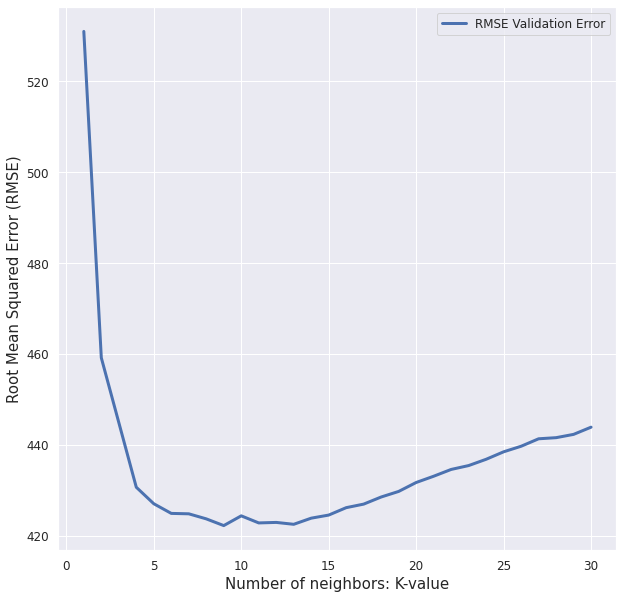

In [ ]:
# Optimum Value of K
rmse_val = [] #to store rmse values for different k
K = []

# Loop over K values
for k in range(30):
  k = k+1
  knn = neighbors.KNeighborsRegressor(n_neighbors = k)
  knn.fit(knn_train_X, knn_train_Y)

  pred = knn.predict(knn_test_X) #make prediction on test set
  error = sqrt(mean_squared_error(knn_test_Y, pred)) #calculate rmse
  K.append(k)
  rmse_val.append(error) #store rmse values

  print('RMSE value for k= ' , k, 'is:', error)
  curve = pd.DataFrame(rmse_val)

# Generate plot
plt.plot(K, rmse_val, label = 'RMSE Validation Error')

plt.legend()
plt.xlabel('Number of neighbors: K-value')
plt.ylabel('Root Mean Squared Error (RMSE)')
plt.show()

In [ ]:
# Optimum value of K is the elbow point of the graph, where the value of MSE is at its minimum
# Which is K = 4

knn_model = neighbors.KNeighborsRegressor(n_neighbors = 9)
knn_model.fit(knn_train_X, knn_train_Y)

# Score on train data
score_knn = knn_model.score(knn_train_X, knn_train_Y)
print('Model performance accuracy score value for the train data when K = 4 is:', score_knn)
# Score on test data
score_knn = knn_model.score(knn_test_X, knn_test_Y)
print('Model performance accuracy score value for the test data when K = 4 is:', score_knn)
# Predition
knn_prediction_test = knn_model.predict(knn_test_X) #make prediction on test set
knn_error_test = sqrt(mean_squared_error(knn_test_Y, knn_prediction_test)) #calculate rmse

print('RMSE value for the test data when K = 4 is:', knn_error_test)

knn_prediction_train = knn_model.predict(knn_train_X)
knn_error_test1 = sqrt(mean_squared_error(knn_train_Y, knn_prediction_train)) #calculate rmse

print('RMSE value for the train data when K = 4 is:', knn_error_test1)

Model performance accuracy score value for the train data when K = 4 is: 0.6699814341963728
Model performance accuracy score value for the test data when K = 4 is: 0.5833400647367475
RMSE value for the test data when K = 4 is: 422.1862898445106
RMSE value for the train data when K = 4 is: 389.6054961577292


In [ ]:
mean_squared_error(knn_train_Y, knn_prediction_train, squared=False)

389.6054961577292